# CS5242 HW1: Get started with PyTorch

PyTorch is an open source machine learning framework with 58k stars on the [github](https://github.com/pytorch/pytorch). In this code tutorial we will learn the basic of PyTorch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

## Section 1: Environmental Setup

First, we need to install the PyTorch and check the pytorch version.

In [32]:
!pip3 install torch

import torch
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.12.1+cu113'

Here are some routines for importing and setting up torch.

In [33]:
# frequently used import
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt

# fix the random number so that the experiments are reproducible
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

The best referrence for pytorch is its [document](https://pytorch.org/docs/stable/index.html). PyTorch is well-known for a good community.

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [34]:
!nvidia-smi

Mon Aug 29 04:28:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |    610MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Here, you can see the memory and memory usage of the applied GPU. For my case, the applied one is a Tesla T4. The GPU applied may be different, but it is ok for our experiments.

Now let's create tensor, which is the basic element in PyTorch.

In [35]:
x1 = torch.tensor(1.0) # tensor on CPU
x2 = torch.tensor(1.0, device="cuda:0") # tensor on GPU
x3 = torch.tensor(1.0, requires_grad=True).cuda() # tensor on GPU and require grad
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor(1.)
x2: tensor(1., device='cuda:0')
x3: tensor(1., device='cuda:0', grad_fn=<ToCopyBackward0>)


In the following sections, you need to fill in the code to complete the function and answer the questions.

The question will be in the form:

===> Question: What is deep learning?  
===> Answer:  
Your answer here.

The code completion will be in the form:

In [36]:
# === Complete the code

# === Complete the code

Grades: HW1 is composed of two parts and 10 points in all. Each part contains 5 points.  

The homework on PDF consists of 10 questions, each is worth 0.5 points. You can write the answer by LaTeX, word or handwritting (take photo) and submit to the system.  

The homework here on notebook (colab) consists of several code completions and 5 questions. There are 18 units for code completions (one unit for one line, which is also a hint). And there are 12 units for questions. 30 units in total will share the 5 points. For submission, you need to submit the notebook with output.

15% off per day late (17:01 is the start of one day)​

0 score if you submit it 7 days after the deadline​

Deadline for homework on PDF: 17:00, 22 Aug  
Deadline for homework on Notebook: 17:00, 30 Aug

## Section 2: Basic Usage

In [37]:
# 2.1: Use autograd to calculate gradients

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.tensor(4.)

# Build a computational graph.
pred = w * x + b
L = (pred - y)**2

# Compute gradients.
# === Complete the code (1')
L.backward()
# === Complete the code

# Print out the gradients.
print(x.grad)
print(w.grad)
print(b.grad)

tensor(4.)
tensor(2.)
tensor(2.)


===> Question 1: Compute the above gradients on your own and show the result from PyTorch is correct. (2')  
===> Answer:   
`dL/dx = dL/dpred * dpred/dx = 2 * w = 4`   
`dL/dw = dL/dpred * dpred/dw = 2 * x = 2`   
`dL/db = dL/dpred * dpred/db = 2 * 1 = 2`

In [38]:
# 2.2 update parameters by gradient descent

# we want to update parameters w and b
lr = 0.01

# 1-step gradient descent
# === Complete the code (2')


# === Complete the code

# current loss
pred = w * x + b
L = (pred - y)**2

w.data = w.data - lr * w.grad
b.data = b.data - lr * b.grad
pred = w * x + b
L = (pred - y)**2

print(w)
print(b)
print(L)

tensor(1.9800, requires_grad=True)
tensor(2.9800, requires_grad=True)
tensor(0.9216, grad_fn=<PowBackward0>)


In [39]:
# 2.3 update parameters by optimizer

# Use SGD optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 5-step gradient descent.
for t in range(5):
  pred = w * x + b
  L = (pred - y)**2
  optimizer.zero_grad()
  # === Complete the code (2')
  L.backward()
  optimizer.step()
  # === Complete the code

print(w)
print(b)
print(L)

tensor(1.8914, requires_grad=True)
tensor(2.8914, requires_grad=True)
tensor(0.6648, grad_fn=<PowBackward0>)


===> Question 2: Why do we need `optimizer.zero_grad()`? (1') What happens if we do not `zero_grad` in each step? (1')  
===> Answer: We do this step because we want to explicitly set the gradients to zero before doing backpropagation. By default, PyTorch accumulates the gradients on subsequent backward pass, so we should zero out the gradients to do the parameter update correctly.

===> Question 3: What's the meaning of `grad_fn=<PowBackward0>`? (1')  
===> Answer: During the forward pass PyTorch will track the operations if one of the involved tensors requires gradients and will create a computation graph from these operations. To be able to backpropagate through this computation graph and to calculate the gradients for all involved parameters, PyTorch will additionally store the corresponding "gradient functions" of the executed operations to the output tensor, which will be called in `.backward()` operation to do backpropagation.


In [40]:
# 2.4 create tensors

shape = (2, 3)

# create an empty tensor
x = torch.empty(shape)
print(x)

# create a full-zero tensor with type long
# === Complete the code (1')
x = torch.zeros(shape, dtype=torch.long)
# === Complete the code
print(x)

# create a a tensor filled with random numbers from 
# a uniform distribution on the interval [0, 1)
# === Complete the code (1')
x = torch.rand(shape)
# === Complete the code
print(x)

# create a tensor filled with random numbers from a standard normal distribution
# === Complete the code (1')
x = torch.randn(shape)
# === Complete the code
print(x)

# create a tensor from numpy
x = np.array([[1, 2], [3, 4]])
# === Complete the code (1')
x = torch.from_numpy(x)
# === Complete the code
print(x)

# convert a tensor to numpy
x = x.numpy()
print(x)

tensor([[ 4.6747e+09,  0.0000e+00, -4.2358e+00],
        [-5.6924e+00, -4.7237e+00, -3.1987e+00]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[ 1.2645, -0.6874,  0.1604],
        [-0.6065, -0.7831,  1.0622]])
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [41]:
# 2.5 gradient of matrix and vector

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

# Forward pass.
pred = linear(x)

# Compute loss.
# === Complete the code (1')
loss = criterion(pred, y)
# === Complete the code
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
# === Complete the code (2')
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)
# === Complete the code

w:  Parameter containing:
tensor([[ 0.5431,  0.3890, -0.2517],
        [-0.1453, -0.5500, -0.0104]], requires_grad=True)
b:  Parameter containing:
tensor([-0.4348, -0.4453], requires_grad=True)
loss:  2.650336503982544
dL/dw:  tensor([[ 1.0951,  0.9776, -1.2607],
        [ 0.0268, -1.7639, -0.2130]])
dL/db:  tensor([-0.3936, -1.1098])


===> Question 4: What is the function of the above code? Do a shape check for the gradient computation above. (2')  
===> Answer: The above code use MSE loss and calculate the gradiants of loss to `w` and loss to `b`. The shape of `w` and `b` is `2 * 3` and `1 * 2` respectively, and `L` is a scalar, so theoretically the shape of `dL/dw` should be the same as `w`, which is `2 * 3`, and the shape of `dL/db` should be the same as `b`, which is `1 * 2`. The result of PyTorch matches these results.

## Section 3: Linear Regression


In [42]:
# Hyper-parameters
input_size = 1
output_size = 1

# Toy dataset
x_train = np.array([[3.2], [4.1], [5.6], [7.69], [6.3], [4.112], 
                    [9.79], [5.182], [6.59], [3.167], [7.042], 
                    [10.921], [5.268], [7.9], [3.0]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [43]:
def main(learning_rate=0.001, num_epochs = 60):
  print('Learning rate = {}, num of epochs = {}'.format(learning_rate, num_epochs))
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizer
  criterion = nn.MSELoss()

  # Create optimizer
  # Hint: check manual for model.parameters
  # === Complete the code (1')
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  # === Complete the code

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      # === Complete the code (2')
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      # === Complete the code
      
      # Backward and optimize
      # === Complete the code (3')
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # === Complete the code
      
      if (epoch+1) % 5 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # Plot the graph
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  plt.plot(x_train, y_train, 'ro', label='Original data')
  plt.plot(x_train, predicted, label='Fitted line')
  plt.legend()
  plt.show()

Learning rate = 0.001, num of epochs = 60
Epoch [5/60], Loss: 3.5557
Epoch [10/60], Loss: 1.5880
Epoch [15/60], Loss: 0.7714
Epoch [20/60], Loss: 0.4324
Epoch [25/60], Loss: 0.2917
Epoch [30/60], Loss: 0.2333
Epoch [35/60], Loss: 0.2090
Epoch [40/60], Loss: 0.1988
Epoch [45/60], Loss: 0.1946
Epoch [50/60], Loss: 0.1928
Epoch [55/60], Loss: 0.1920
Epoch [60/60], Loss: 0.1916


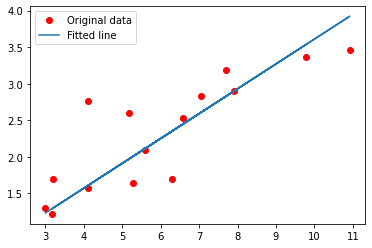

In [44]:
main()

Now let's investigate into how learning rate affects the training process.

===> Question 5: Experiments with different learning rates and num_epochs.   
When will the training diverges? What's your suggested value for the learning rate?   
Justify your answer by running more experiments (leaving the results in the notebook). (5')     
===> Answer: According to my experiments, when the learning rate is greater than 0.03, the training will diverge. When learning rate is small, adding epoch will reduce the loss. To achieve both convergence and efficiency, my suggestion for the learning rate is 0.001

Learning rate = 1, num of epochs = 60
Epoch [5/60], Loss: 126793679460368384.0000
Epoch [10/60], Loss: 2012671675693163928885542619833171968.0000
Epoch [15/60], Loss: inf
Epoch [20/60], Loss: inf
Epoch [25/60], Loss: nan
Epoch [30/60], Loss: nan
Epoch [35/60], Loss: nan
Epoch [40/60], Loss: nan
Epoch [45/60], Loss: nan
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


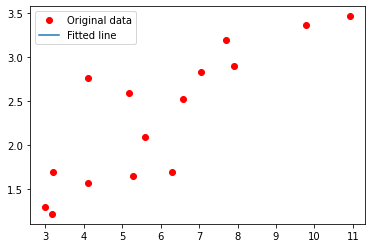

Learning rate = 0.5, num of epochs = 60
Epoch [5/60], Loss: 275046668959744.0000
Epoch [10/60], Loss: 3777981740112002942543847227392.0000
Epoch [15/60], Loss: inf
Epoch [20/60], Loss: inf
Epoch [25/60], Loss: inf
Epoch [30/60], Loss: nan
Epoch [35/60], Loss: nan
Epoch [40/60], Loss: nan
Epoch [45/60], Loss: nan
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


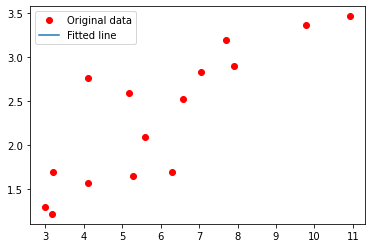

Learning rate = 0.25, num of epochs = 60
Epoch [5/60], Loss: 1015904665600.0000
Epoch [10/60], Loss: 10651674607444491218452480.0000
Epoch [15/60], Loss: inf
Epoch [20/60], Loss: inf
Epoch [25/60], Loss: inf
Epoch [30/60], Loss: inf
Epoch [35/60], Loss: nan
Epoch [40/60], Loss: nan
Epoch [45/60], Loss: nan
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


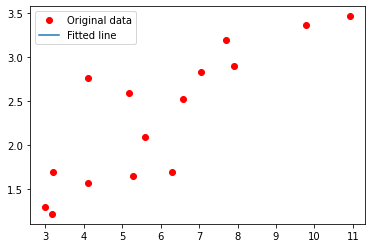

Learning rate = 0.125, num of epochs = 60
Epoch [5/60], Loss: 156466640.0000
Epoch [10/60], Loss: 960423269423382528.0000
Epoch [15/60], Loss: 5895267139473892941183844352.0000
Epoch [20/60], Loss: inf
Epoch [25/60], Loss: inf
Epoch [30/60], Loss: inf
Epoch [35/60], Loss: inf
Epoch [40/60], Loss: inf
Epoch [45/60], Loss: nan
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


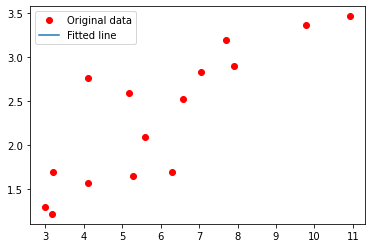

Learning rate = 0.0625, num of epochs = 60
Epoch [5/60], Loss: 6774575.5000
Epoch [10/60], Loss: 13392000581632.0000
Epoch [15/60], Loss: 26473354878334795776.0000
Epoch [20/60], Loss: 52332601280374754714320896.0000
Epoch [25/60], Loss: 103451186719531853275363452911616.0000
Epoch [30/60], Loss: inf
Epoch [35/60], Loss: inf
Epoch [40/60], Loss: inf
Epoch [45/60], Loss: inf
Epoch [50/60], Loss: inf
Epoch [55/60], Loss: inf
Epoch [60/60], Loss: inf


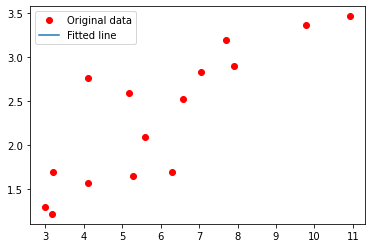

Learning rate = 0.03125, num of epochs = 60
Epoch [5/60], Loss: 1496.1152
Epoch [10/60], Loss: 199174.9531
Epoch [15/60], Loss: 26518598.0000
Epoch [20/60], Loss: 3530746624.0000
Epoch [25/60], Loss: 470091661312.0000
Epoch [30/60], Loss: 62589027483648.0000
Epoch [35/60], Loss: 8333242650329088.0000
Epoch [40/60], Loss: 1109506188472483840.0000
Epoch [45/60], Loss: 147722078796170395648.0000
Epoch [50/60], Loss: 19668052738658019573760.0000
Epoch [55/60], Loss: 2618648483696852942716928.0000
Epoch [60/60], Loss: 348652944619564412251930624.0000


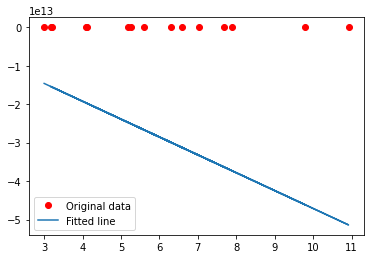

Learning rate = 0.015625, num of epochs = 60
Epoch [5/60], Loss: 0.1664
Epoch [10/60], Loss: 0.1647
Epoch [15/60], Loss: 0.1645
Epoch [20/60], Loss: 0.1643
Epoch [25/60], Loss: 0.1641
Epoch [30/60], Loss: 0.1639
Epoch [35/60], Loss: 0.1637
Epoch [40/60], Loss: 0.1635
Epoch [45/60], Loss: 0.1633
Epoch [50/60], Loss: 0.1632
Epoch [55/60], Loss: 0.1630
Epoch [60/60], Loss: 0.1629


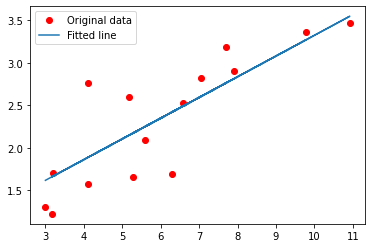

Learning rate = 0.0078125, num of epochs = 60
Epoch [5/60], Loss: 0.2033
Epoch [10/60], Loss: 0.2025
Epoch [15/60], Loss: 0.2016
Epoch [20/60], Loss: 0.2008
Epoch [25/60], Loss: 0.2000
Epoch [30/60], Loss: 0.1992
Epoch [35/60], Loss: 0.1984
Epoch [40/60], Loss: 0.1976
Epoch [45/60], Loss: 0.1969
Epoch [50/60], Loss: 0.1961
Epoch [55/60], Loss: 0.1954
Epoch [60/60], Loss: 0.1947


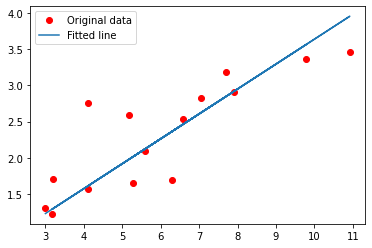

Learning rate = 0.00390625, num of epochs = 60
Epoch [5/60], Loss: 0.5368
Epoch [10/60], Loss: 0.2571
Epoch [15/60], Loss: 0.2510
Epoch [20/60], Loss: 0.2500
Epoch [25/60], Loss: 0.2491
Epoch [30/60], Loss: 0.2482
Epoch [35/60], Loss: 0.2474
Epoch [40/60], Loss: 0.2465
Epoch [45/60], Loss: 0.2456
Epoch [50/60], Loss: 0.2448
Epoch [55/60], Loss: 0.2439
Epoch [60/60], Loss: 0.2431


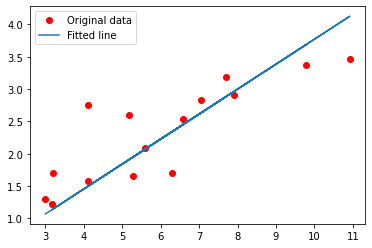

Learning rate = 0.001953125, num of epochs = 60
Epoch [5/60], Loss: 1.0359
Epoch [10/60], Loss: 0.3917
Epoch [15/60], Loss: 0.2844
Epoch [20/60], Loss: 0.2662
Epoch [25/60], Loss: 0.2628
Epoch [30/60], Loss: 0.2618
Epoch [35/60], Loss: 0.2612
Epoch [40/60], Loss: 0.2607
Epoch [45/60], Loss: 0.2601
Epoch [50/60], Loss: 0.2596
Epoch [55/60], Loss: 0.2592
Epoch [60/60], Loss: 0.2587


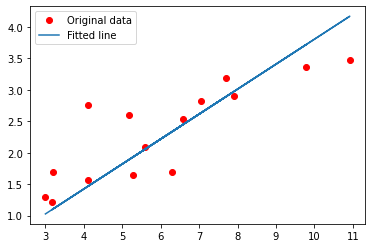

Learning rate = 0.0009765625, num of epochs = 60
Epoch [5/60], Loss: 2.9049
Epoch [10/60], Loss: 1.3447
Epoch [15/60], Loss: 0.6830
Epoch [20/60], Loss: 0.4024
Epoch [25/60], Loss: 0.2834
Epoch [30/60], Loss: 0.2328
Epoch [35/60], Loss: 0.2114
Epoch [40/60], Loss: 0.2022
Epoch [45/60], Loss: 0.1983
Epoch [50/60], Loss: 0.1966
Epoch [55/60], Loss: 0.1958
Epoch [60/60], Loss: 0.1954


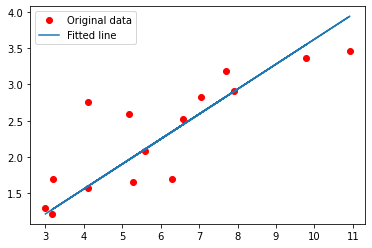

Learning rate = 0.00048828125, num of epochs = 60
Epoch [5/60], Loss: 44.9853
Epoch [10/60], Loss: 29.6687
Epoch [15/60], Loss: 19.6026
Epoch [20/60], Loss: 12.9871
Epoch [25/60], Loss: 8.6394
Epoch [30/60], Loss: 5.7820
Epoch [35/60], Loss: 3.9041
Epoch [40/60], Loss: 2.6698
Epoch [45/60], Loss: 1.8586
Epoch [50/60], Loss: 1.3254
Epoch [55/60], Loss: 0.9750
Epoch [60/60], Loss: 0.7446


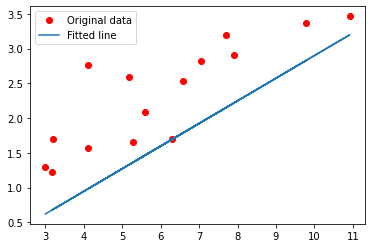

Learning rate = 0.000244140625, num of epochs = 60
Epoch [5/60], Loss: 3.9711
Epoch [10/60], Loss: 3.3160
Epoch [15/60], Loss: 2.7836
Epoch [20/60], Loss: 2.3510
Epoch [25/60], Loss: 1.9996
Epoch [30/60], Loss: 1.7140
Epoch [35/60], Loss: 1.4819
Epoch [40/60], Loss: 1.2933
Epoch [45/60], Loss: 1.1400
Epoch [50/60], Loss: 1.0155
Epoch [55/60], Loss: 0.9142
Epoch [60/60], Loss: 0.8320


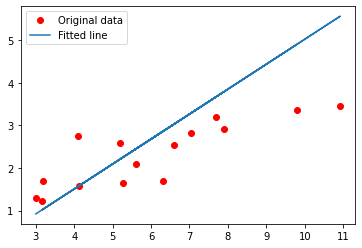

Learning rate = 0.0001220703125, num of epochs = 60
Epoch [5/60], Loss: 3.5983
Epoch [10/60], Loss: 3.2620
Epoch [15/60], Loss: 2.9588
Epoch [20/60], Loss: 2.6853
Epoch [25/60], Loss: 2.4386
Epoch [30/60], Loss: 2.2161
Epoch [35/60], Loss: 2.0155
Epoch [40/60], Loss: 1.8346
Epoch [45/60], Loss: 1.6714
Epoch [50/60], Loss: 1.5243
Epoch [55/60], Loss: 1.3915
Epoch [60/60], Loss: 1.2719


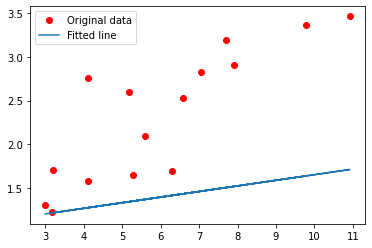

Learning rate = 6.103515625e-05, num of epochs = 60
Epoch [5/60], Loss: 0.2221
Epoch [10/60], Loss: 0.2220
Epoch [15/60], Loss: 0.2219
Epoch [20/60], Loss: 0.2218
Epoch [25/60], Loss: 0.2217
Epoch [30/60], Loss: 0.2216
Epoch [35/60], Loss: 0.2215
Epoch [40/60], Loss: 0.2214
Epoch [45/60], Loss: 0.2213
Epoch [50/60], Loss: 0.2212
Epoch [55/60], Loss: 0.2211
Epoch [60/60], Loss: 0.2211


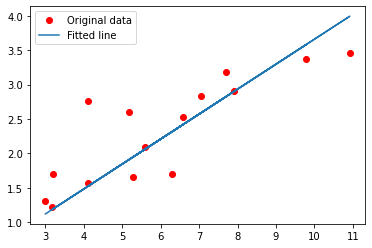

Learning rate = 3.0517578125e-05, num of epochs = 60
Epoch [5/60], Loss: 55.1768
Epoch [10/60], Loss: 53.7795
Epoch [15/60], Loss: 52.4177
Epoch [20/60], Loss: 51.0905
Epoch [25/60], Loss: 49.7969
Epoch [30/60], Loss: 48.5363
Epoch [35/60], Loss: 47.3076
Epoch [40/60], Loss: 46.1102
Epoch [45/60], Loss: 44.9431
Epoch [50/60], Loss: 43.8057
Epoch [55/60], Loss: 42.6972
Epoch [60/60], Loss: 41.6169


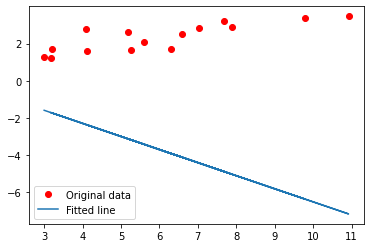

Learning rate = 1.52587890625e-05, num of epochs = 60
Epoch [5/60], Loss: 52.0251
Epoch [10/60], Loss: 51.3638
Epoch [15/60], Loss: 50.7110
Epoch [20/60], Loss: 50.0664
Epoch [25/60], Loss: 49.4302
Epoch [30/60], Loss: 48.8020
Epoch [35/60], Loss: 48.1819
Epoch [40/60], Loss: 47.5697
Epoch [45/60], Loss: 46.9653
Epoch [50/60], Loss: 46.3686
Epoch [55/60], Loss: 45.7796
Epoch [60/60], Loss: 45.1981


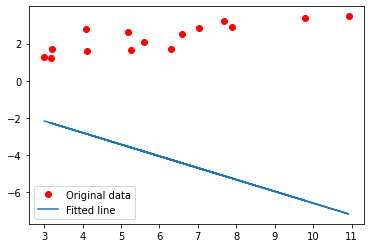

Learning rate = 7.62939453125e-06, num of epochs = 60
Epoch [5/60], Loss: 22.0853
Epoch [10/60], Loss: 21.9454
Epoch [15/60], Loss: 21.8063
Epoch [20/60], Loss: 21.6682
Epoch [25/60], Loss: 21.5309
Epoch [30/60], Loss: 21.3945
Epoch [35/60], Loss: 21.2590
Epoch [40/60], Loss: 21.1243
Epoch [45/60], Loss: 20.9905
Epoch [50/60], Loss: 20.8576
Epoch [55/60], Loss: 20.7255
Epoch [60/60], Loss: 20.5942


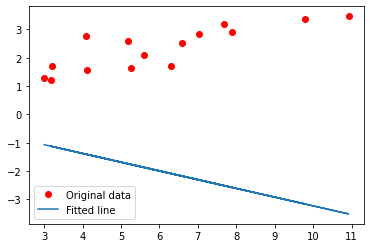

Learning rate = 3.814697265625e-06, num of epochs = 60
Epoch [5/60], Loss: 2.5635
Epoch [10/60], Loss: 2.5558
Epoch [15/60], Loss: 2.5482
Epoch [20/60], Loss: 2.5405
Epoch [25/60], Loss: 2.5329
Epoch [30/60], Loss: 2.5253
Epoch [35/60], Loss: 2.5177
Epoch [40/60], Loss: 2.5101
Epoch [45/60], Loss: 2.5026
Epoch [50/60], Loss: 2.4951
Epoch [55/60], Loss: 2.4876
Epoch [60/60], Loss: 2.4802


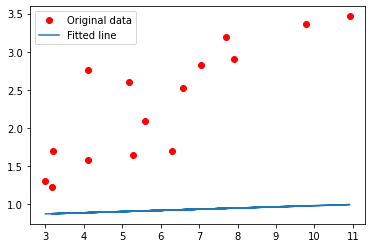

Learning rate = 1.9073486328125e-06, num of epochs = 60
Epoch [5/60], Loss: 0.7321
Epoch [10/60], Loss: 0.7312
Epoch [15/60], Loss: 0.7303
Epoch [20/60], Loss: 0.7294
Epoch [25/60], Loss: 0.7285
Epoch [30/60], Loss: 0.7276
Epoch [35/60], Loss: 0.7267
Epoch [40/60], Loss: 0.7258
Epoch [45/60], Loss: 0.7249
Epoch [50/60], Loss: 0.7240
Epoch [55/60], Loss: 0.7231
Epoch [60/60], Loss: 0.7222


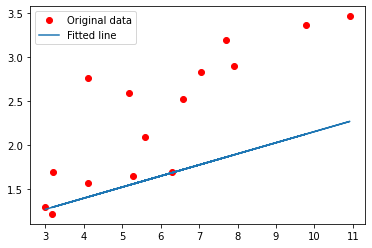

Learning rate = 0.0001, num of epochs = 600
Epoch [5/600], Loss: 1.2299
Epoch [10/600], Loss: 1.1627
Epoch [15/600], Loss: 1.1009
Epoch [20/600], Loss: 1.0441
Epoch [25/600], Loss: 0.9919
Epoch [30/600], Loss: 0.9439
Epoch [35/600], Loss: 0.8998
Epoch [40/600], Loss: 0.8593
Epoch [45/600], Loss: 0.8221
Epoch [50/600], Loss: 0.7878
Epoch [55/600], Loss: 0.7564
Epoch [60/600], Loss: 0.7275
Epoch [65/600], Loss: 0.7009
Epoch [70/600], Loss: 0.6765
Epoch [75/600], Loss: 0.6541
Epoch [80/600], Loss: 0.6334
Epoch [85/600], Loss: 0.6145
Epoch [90/600], Loss: 0.5970
Epoch [95/600], Loss: 0.5810
Epoch [100/600], Loss: 0.5663
Epoch [105/600], Loss: 0.5527
Epoch [110/600], Loss: 0.5403
Epoch [115/600], Loss: 0.5288
Epoch [120/600], Loss: 0.5183
Epoch [125/600], Loss: 0.5087
Epoch [130/600], Loss: 0.4998
Epoch [135/600], Loss: 0.4916
Epoch [140/600], Loss: 0.4841
Epoch [145/600], Loss: 0.4772
Epoch [150/600], Loss: 0.4708
Epoch [155/600], Loss: 0.4649
Epoch [160/600], Loss: 0.4596
Epoch [165/600],

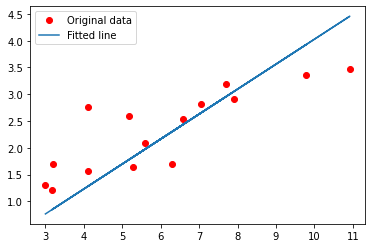

In [47]:
lr = 1
for i in range(20):
  main(learning_rate = lr, num_epochs = 60)
  lr = lr / 2

lr = 0.0001
main(learning_rate = lr, num_epochs = 600)